<a href="https://colab.research.google.com/github/spectrmen/mashine_learning_ed/blob/main/%22lab01_part2_ml_pipeline_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2025-11-14 18:25:40--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.003s  

2025-11-14 18:25:40 (16.4 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [ ]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,398,98,38,70,186,68,6,164,39,20,136,189,413,129,71,3,17,200,203
1,353,81,47,69,146,64,6,151,44,19,147,171,340,195,75,5,0,183,188
2,708,94,49,82,137,56,10,159,43,20,160,176,367,186,76,10,7,183,192
3,554,113,48,98,208,62,9,203,33,23,151,216,613,183,64,17,29,193,204
4,105,108,53,103,202,64,10,220,30,25,168,224,711,214,73,11,10,188,199
5,173,96,49,98,187,59,6,213,31,24,152,228,680,210,77,8,28,188,189
6,471,104,55,109,230,67,12,218,30,24,174,230,706,226,67,8,22,191,202
7,520,89,40,89,174,58,8,177,37,21,133,202,471,155,70,7,18,189,196
8,147,91,40,76,171,67,7,149,44,19,135,169,332,144,68,4,17,192,200
9,320,105,54,100,220,69,10,221,30,25,170,232,718,202,73,0,13,187,199


Methods `describe` and `info` deliver some useful information.

In [ ]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,427.118397,93.451730,44.686703,81.708561,167.979964,61.597450,8.373406,167.765027,41.154827,20.493625,147.357013,187.675774,434.307832,174.187614,72.473588,6.428051,12.843352,188.857923,195.482696
std,244.389838,8.226489,6.163543,15.429577,32.874090,7.171776,4.129397,32.964278,7.713605,2.574874,14.478906,31.438048,175.989771,32.960706,7.028470,4.837205,9.080593,6.092193,7.273224
min,0.000000,76.000000,33.000000,40.000000,105.000000,48.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,225.000000,87.000000,40.000000,70.000000,140.000000,57.000000,6.000000,146.000000,34.000000,19.000000,135.000000,168.000000,318.000000,148.000000,68.000000,2.000000,6.000000,184.000000,191.000000
50%,417.000000,92.000000,44.000000,79.000000,166.000000,61.000000,8.000000,156.000000,43.000000,19.000000,145.000000,177.000000,361.000000,173.000000,71.000000,6.000000,11.000000,188.000000,196.000000
75%,640.000000,99.000000,49.000000,96.000000,194.000000,65.000000,10.000000,197.000000,46.000000,23.000000,158.000000,214.000000,578.000000,197.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,58.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,40.000000,203.000000,211.000000


In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [ ]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print("Data preprocessing completed: StandardScaler applied to normalize features")
print(f"Train data shape: {X_train_scaled.shape}, Test data shape: {X_test_scaled.shape}")
print("\nExplanation:")
print("- Standardization (z-score normalization) transforms features to have mean=0 and std=1")
print("- This is crucial for algorithms like logistic regression and PCA that are sensitive to feature scales")
print("- Without standardization, features with larger scales would dominate the model")


Data preprocessing completed: StandardScaler applied to normalize features
Train data shape: (549, 19), Test data shape: (297, 19)

Explanation:
- Standardization (z-score normalization) transforms features to have mean=0 and std=1
- This is crucial for algorithms like logistic regression and PCA that are sensitive to feature scales
- Without standardization, features with larger scales would dominate the model


array([[-1.19255993e-01,  5.53385205e-01, -1.08586924e+00,
        -7.59530818e-01,  5.48653073e-01,  8.93556776e-01,
        -5.75282722e-01, -1.14319539e-01, -2.79608827e-01,
        -1.91883138e-01, -7.85098673e-01,  4.21601726e-02,
        -1.21184685e-01, -1.37220435e+00, -2.09851108e-01,
        -7.09330527e-01,  4.58168240e-01,  1.83057862e+00,
         1.03450129e+00],
       [-3.03555963e-01, -1.51499450e+00,  3.75661656e-01,
        -8.24400516e-01, -6.69220321e-01,  3.35306227e-01,
        -5.75282722e-01, -5.09045493e-01,  3.69187648e-01,
        -5.80605804e-01, -2.46799262e-02, -5.30916617e-01,
        -5.36359811e-01,  6.32006081e-01,  3.59781813e-01,
        -2.95491569e-01, -1.41566357e+00, -9.62422893e-01,
        -1.02973863e+00],
       [ 1.15036602e+00,  6.67076278e-02,  7.00446300e-01,
         1.89055586e-02, -9.43241834e-01, -7.81194872e-01,
         3.94265135e-01, -2.66137214e-01,  2.39428353e-01,
        -1.91883138e-01,  8.73996775e-01, -3.71728620e-01,
    

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, classification_report
import matplotlib.pyplot as plt

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'l1_ratio': [0.1, 0.5, 0.9]
}

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best parameters: {'C': 10, 'l1_ratio': 0.1, 'penalty': 'l2'}
Best cross-validation score: 0.7906

Test F1 score (macro): 0.7875
Test Accuracy: 0.7845

Classification Report:
              precision    recall  f1-score   support

         bus       0.92      0.96      0.94        69
        opel       0.62      0.64      0.63        74
        saab       0.68      0.60      0.64        81
         van       0.92      0.97      0.95        73

    accuracy                           0.78       297
   macro avg       0.78      0.79      0.79       297
weighted avg       0.78      0.78      0.78       297

scikitplot not installed. Install with: pip install scikit-plot


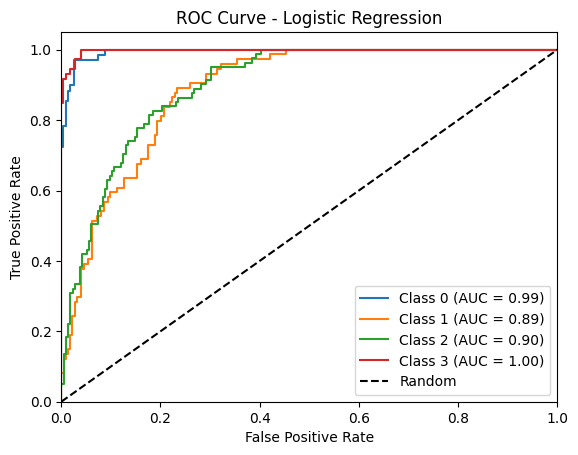

In [ ]:
lr_base = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, random_state=42)
grid_search = GridSearchCV(lr_base, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Train best model
lr_best = grid_search.best_estimator_
y_pred = lr_best.predict(X_test_scaled)
y_pred_proba = lr_best.predict_proba(X_test_scaled)

# Calculate metrics
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest F1 score (macro): {f1:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot ROC curve
try:
    import scikitplot as skplt
    skplt.metrics.plot_roc(y_test, y_pred_proba)
    plt.title('ROC Curve - Logistic Regression')
    plt.show()
except ImportError:
    print("scikitplot not installed. Install with: pip install scikit-plot")
    from sklearn.metrics import roc_curve, auc
    from sklearn.preprocessing import label_binarize
    import numpy as np

    # Binarize the output for multiclass ROC
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_bin.shape[1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Logistic Regression')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

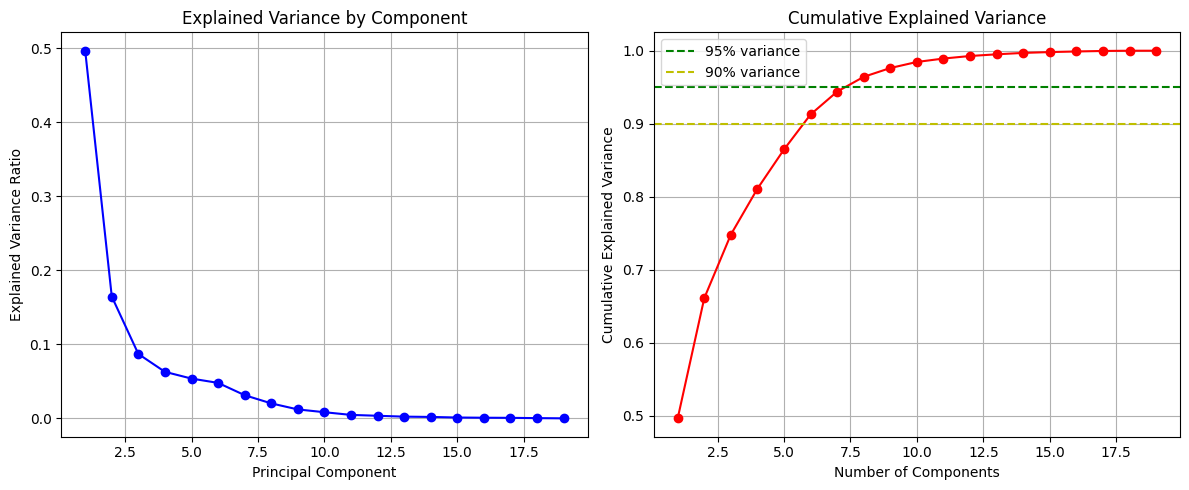

First 10 components explain [0.49666406 0.66122773 0.74821398 0.8110633  0.86478651 0.91270657
 0.94400862 0.96424429 0.97629699 0.984601  ]
Number of components for 90% variance: 6
Number of components for 95% variance: 8


In [ ]:
### YOUR CODE HERE
# Apply PCA to scaled training data
from sklearn.decomposition import PCA
pca_full = PCA()
pca_full.fit(X_train_scaled)

# Calculate explained variance ratio
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% variance')
plt.axhline(y=0.90, color='y', linestyle='--', label='90% variance')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"First 10 components explain {cumulative_variance[:10]}")
print(f"Number of components for 90% variance: {np.argmax(cumulative_variance >= 0.90) + 1}")
print(f"Number of components for 95% variance: {np.argmax(cumulative_variance >= 0.95) + 1}")


#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [ ]:
### YOUR CODE HERE
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Selected {n_components} components (explains {cumulative_variance[n_components-1]:.2%} of variance)")
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original shape: {X_train_scaled.shape}")
print(f"PCA transformed shape: {X_train_pca.shape}")
print(f"Dimensionality reduction: {X_train_scaled.shape[1]} -> {X_train_pca.shape[1]} features")

Selected 8 components (explains 96.42% of variance)
Original shape: (549, 19)
PCA transformed shape: (549, 8)
Dimensionality reduction: 19 -> 8 features


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [ ]:
### YOUR CODE HERE
from sklearn.pipeline import Pipeline

param_grid_pca = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'l1_ratio': [0.1, 0.5, 0.9]
}
lr_pca_base = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, random_state=42)
grid_search_pca = GridSearchCV(lr_pca_base, param_grid_pca, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)
grid_search_pca.fit(X_train_pca, y_train)




print(f"Best parameters (PCA): {grid_search_pca.best_params_}")
print(f"Best cross-validation score (PCA): {grid_search_pca.best_score_:.4f}")

# Train best model
lr_pca_best = grid_search_pca.best_estimator_
y_pred_pca = lr_pca_best.predict(X_test_pca)
y_pred_proba_pca = lr_pca_best.predict_proba(X_test_pca)

# Calculate metrics
f1_pca = f1_score(y_test, y_pred_pca, average='macro')
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"\nTest F1 score (macro) - PCA: {f1_pca:.4f}")
print(f"Test Accuracy - PCA: {accuracy_pca:.4f}")
print("\nClassification Report - PCA:")
print(classification_report(y_test, y_pred_pca))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters (PCA): {'C': 1, 'l1_ratio': 0.1, 'penalty': 'l1'}
Best cross-validation score (PCA): 0.6017

Test F1 score (macro) - PCA: 0.6505
Test Accuracy - PCA: 0.6633

Classification Report - PCA:
              precision    recall  f1-score   support

         bus       0.68      0.91      0.78        69
        opel       0.53      0.43      0.48        74
        saab       0.58      0.42      0.49        81
         van       0.80      0.93      0.86        73

    accuracy                           0.66       297
   macro avg       0.65      0.67      0.65       297
weighted avg       0.64      0.66      0.64       297



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
!pip install scikit-plot

scikitplot not installed. Using sklearn for ROC curve...


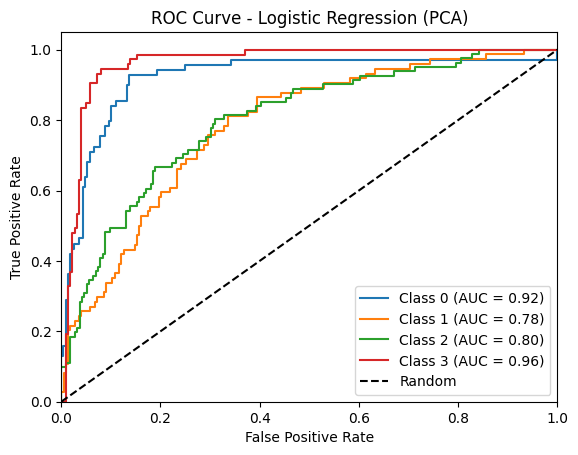

In [ ]:
print("scikitplot not installed. Using sklearn for ROC curve...")
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba_pca[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (PCA)')
plt.legend(loc="lower right")
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

# Hyperparameter tuning for decision tree
param_grid_dt = {
    'max_depth': range(1, 21),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_base = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(dt_base, param_grid_dt, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train_scaled, y_train)

print(f"Best parameters (Decision Tree): {grid_search_dt.best_params_}")
print(f"Best cross-validation score (Decision Tree): {grid_search_dt.best_score_:.4f}")

# Train best model
dt_best = grid_search_dt.best_estimator_
y_pred_dt = dt_best.predict(X_test_scaled)
y_pred_proba_dt = dt_best.predict_proba(X_test_scaled)

# Calculate metrics
f1_dt = f1_score(y_test, y_pred_dt, average='macro')
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"\nTest F1 score (macro) - Decision Tree: {f1_dt:.4f}")
print(f"Test Accuracy - Decision Tree: {accuracy_dt:.4f}")
print("\nClassification Report - Decision Tree:")
print(classification_report(y_test, y_pred_dt))

# Store best max_depth for later use
best_max_depth = grid_search_dt.best_params_['max_depth']
print(f"\nOptimal max_depth: {best_max_depth}")

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters (Decision Tree): {'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score (Decision Tree): 0.6939

Test F1 score (macro) - Decision Tree: 0.6911
Test Accuracy - Decision Tree: 0.6902

Classification Report - Decision Tree:
              precision    recall  f1-score   support

         bus       0.87      0.94      0.90        69
        opel       0.52      0.64      0.57        74
        saab       0.53      0.37      0.43        81
         van       0.85      0.86      0.86        73

    accuracy                           0.69       297
   macro avg       0.69      0.70      0.69       297
weighted avg       0.68      0.69      0.68       297


Optimal max_depth: 12


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

Building Bagging ensemble with Logistic Regression...

Building Bagging ensemble with Decision Trees...


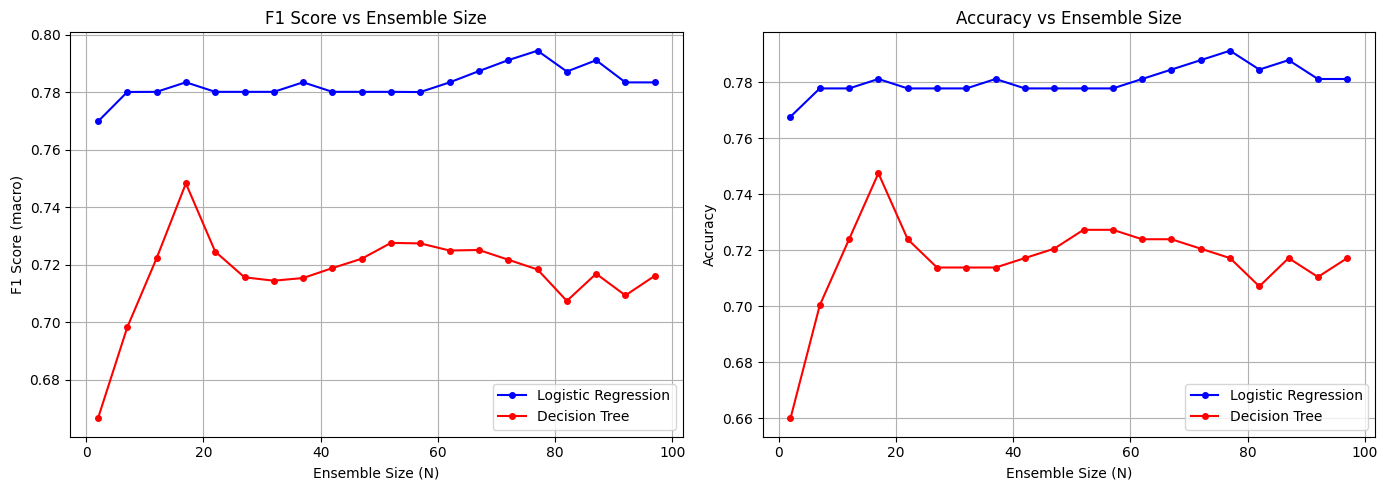


Optimal ensemble size (Logistic Regression):
  F1: N=77, F1=0.7945
  Accuracy: N=77, Acc=0.7912

Optimal ensemble size (Decision Tree):
  F1: N=17, F1=0.7483
  Accuracy: N=17, Acc=0.7475

Analysis:
- The optimal number of algorithms depends on the model type and metric.
- Generally, performance improves with more models but plateaus after a certain point.
- Decision trees in ensembles might benefit from different hyperparameters (e.g., higher max_depth)
  because individual trees in bagging can be more complex since variance is reduced by averaging.


In [ ]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Ensemble sizes to test
ensemble_sizes = range(2, 101, 5)

# Bagging with Logistic Regression
print("Building Bagging ensemble with Logistic Regression...")
f1_scores_lr = []
accuracy_scores_lr = []

# Use best hyperparameters from section 2.1
lr_base_params = grid_search.best_params_.copy()
lr_base_params.update({
    'multi_class': 'multinomial',
    'solver': 'saga',
    'tol': 1e-3,
    'max_iter': 500,
    'random_state': 42
})

for n in ensemble_sizes:
    bagging_lr = BaggingClassifier(
        estimator=LogisticRegression(**lr_base_params),
        n_estimators=n,
        random_state=42,
        n_jobs=-1
    )
    bagging_lr.fit(X_train_scaled, y_train)
    y_pred_bag_lr = bagging_lr.predict(X_test_scaled)

    f1_scores_lr.append(f1_score(y_test, y_pred_bag_lr, average='macro'))
    accuracy_scores_lr.append(accuracy_score(y_test, y_pred_bag_lr))

    if n % 20 == 0:
        print(f"  Completed {n} estimators...")

# Bagging with Decision Trees
print("\nBuilding Bagging ensemble with Decision Trees...")
f1_scores_dt = []
accuracy_scores_dt = []

# Use best hyperparameters from section 2.5
dt_base_params = grid_search_dt.best_params_.copy()
dt_base_params.update({'random_state': 42})

for n in ensemble_sizes:
    bagging_dt = BaggingClassifier(
        estimator=DecisionTreeClassifier(**dt_base_params),
        n_estimators=n,
        random_state=42,
        n_jobs=-1
    )
    bagging_dt.fit(X_train_scaled, y_train)
    y_pred_bag_dt = bagging_dt.predict(X_test_scaled)

    f1_scores_dt.append(f1_score(y_test, y_pred_bag_dt, average='macro'))
    accuracy_scores_dt.append(accuracy_score(y_test, y_pred_bag_dt))

    if n % 20 == 0:
        print(f"  Completed {n} estimators...")

# Plot results
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(ensemble_sizes, f1_scores_lr, 'b-o', label='Logistic Regression', markersize=4)
plt.plot(ensemble_sizes, f1_scores_dt, 'r-o', label='Decision Tree', markersize=4)
plt.xlabel('Ensemble Size (N)')
plt.ylabel('F1 Score (macro)')
plt.title('F1 Score vs Ensemble Size')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(ensemble_sizes, accuracy_scores_lr, 'b-o', label='Logistic Regression', markersize=4)
plt.plot(ensemble_sizes, accuracy_scores_dt, 'r-o', label='Decision Tree', markersize=4)
plt.xlabel('Ensemble Size (N)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Ensemble Size')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Find optimal ensemble sizes
optimal_n_lr_f1 = ensemble_sizes[np.argmax(f1_scores_lr)]
optimal_n_dt_f1 = ensemble_sizes[np.argmax(f1_scores_dt)]
optimal_n_lr_acc = ensemble_sizes[np.argmax(accuracy_scores_lr)]
optimal_n_dt_acc = ensemble_sizes[np.argmax(accuracy_scores_dt)]

print(f"\nOptimal ensemble size (Logistic Regression):")
print(f"  F1: N={optimal_n_lr_f1}, F1={max(f1_scores_lr):.4f}")
print(f"  Accuracy: N={optimal_n_lr_acc}, Acc={max(accuracy_scores_lr):.4f}")

print(f"\nOptimal ensemble size (Decision Tree):")
print(f"  F1: N={optimal_n_dt_f1}, F1={max(f1_scores_dt):.4f}")
print(f"  Accuracy: N={optimal_n_dt_acc}, Acc={max(accuracy_scores_dt):.4f}")

print("\nAnalysis:")
print("- The optimal number of algorithms depends on the model type and metric.")
print("- Generally, performance improves with more models but plateaus after a certain point.")
print("- Decision trees in ensembles might benefit from different hyperparameters (e.g., higher max_depth)")
print("  because individual trees in bagging can be more complex since variance is reduced by averaging.")


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

Training Random Forest with varying number of trees...


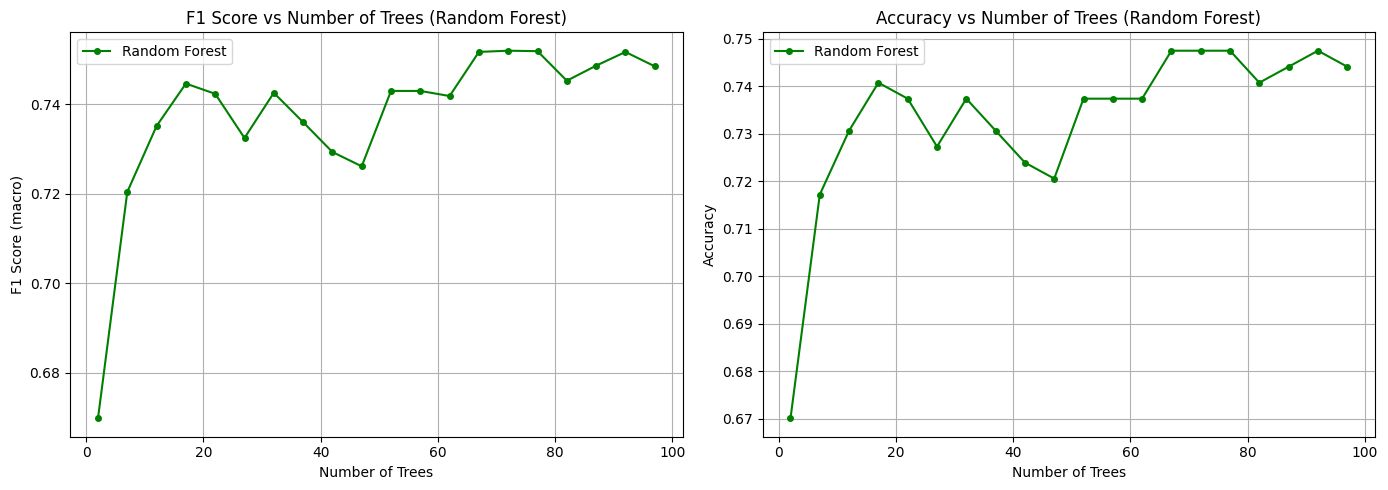


Optimal number of trees (Random Forest):
  F1: n_estimators=72, F1=0.7520
  Accuracy: n_estimators=67, Acc=0.7475

Comparison with Bagging:
  Bagging DT optimal (F1): N=17
  Random Forest optimal (F1): N=72

Explanation:
- Random Forest typically needs fewer trees than bagging because it uses feature subsampling
  which increases diversity among trees, making each tree more valuable.
- The optimal number may differ because Random Forest has built-in regularization
  through feature subsampling, while bagging relies solely on bootstrap sampling.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
n_trees_range = range(2, 101, 5)
f1_scores_rf = []
accuracy_scores_rf = []

print("Training Random Forest with varying number of trees...")
for n_trees in n_trees_range:
    rf = RandomForestClassifier(
        n_estimators=n_trees,
        max_depth=best_max_depth,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train_scaled, y_train)
    y_pred_rf = rf.predict(X_test_scaled)

    f1_scores_rf.append(f1_score(y_test, y_pred_rf, average='macro'))
    accuracy_scores_rf.append(accuracy_score(y_test, y_pred_rf))

    if n_trees % 20 == 0:
        print(f"  Completed {n_trees} trees...")

# Plot results
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(n_trees_range, f1_scores_rf, 'g-o', label='Random Forest', markersize=4)
plt.xlabel('Number of Trees')
plt.ylabel('F1 Score (macro)')
plt.title('F1 Score vs Number of Trees (Random Forest)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_trees_range, accuracy_scores_rf, 'g-o', label='Random Forest', markersize=4)
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Trees (Random Forest)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Find optimal number of trees
optimal_n_rf_f1 = n_trees_range[np.argmax(f1_scores_rf)]
optimal_n_rf_acc = n_trees_range[np.argmax(accuracy_scores_rf)]

print(f"\nOptimal number of trees (Random Forest):")
print(f"  F1: n_estimators={optimal_n_rf_f1}, F1={max(f1_scores_rf):.4f}")
print(f"  Accuracy: n_estimators={optimal_n_rf_acc}, Acc={max(accuracy_scores_rf):.4f}")

print("\nComparison with Bagging:")
print(f"  Bagging DT optimal (F1): N={optimal_n_dt_f1}")
print(f"  Random Forest optimal (F1): N={optimal_n_rf_f1}")
print("\nExplanation:")
print("- Random Forest typically needs fewer trees than bagging because it uses feature subsampling")
print("  which increases diversity among trees, making each tree more valuable.")
print("- The optimal number may differ because Random Forest has built-in regularization")
print("  through feature subsampling, while bagging relies solely on bootstrap sampling.")

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

Generating learning curves...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


  Completed 1/10 splits...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


  Completed 2/10 splits...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


  Completed 3/10 splits...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


  Completed 4/10 splits...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


  Completed 5/10 splits...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


  Completed 6/10 splits...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


  Completed 7/10 splits...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


  Completed 8/10 splits...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


  Completed 9/10 splits...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


  Completed 10/10 splits...


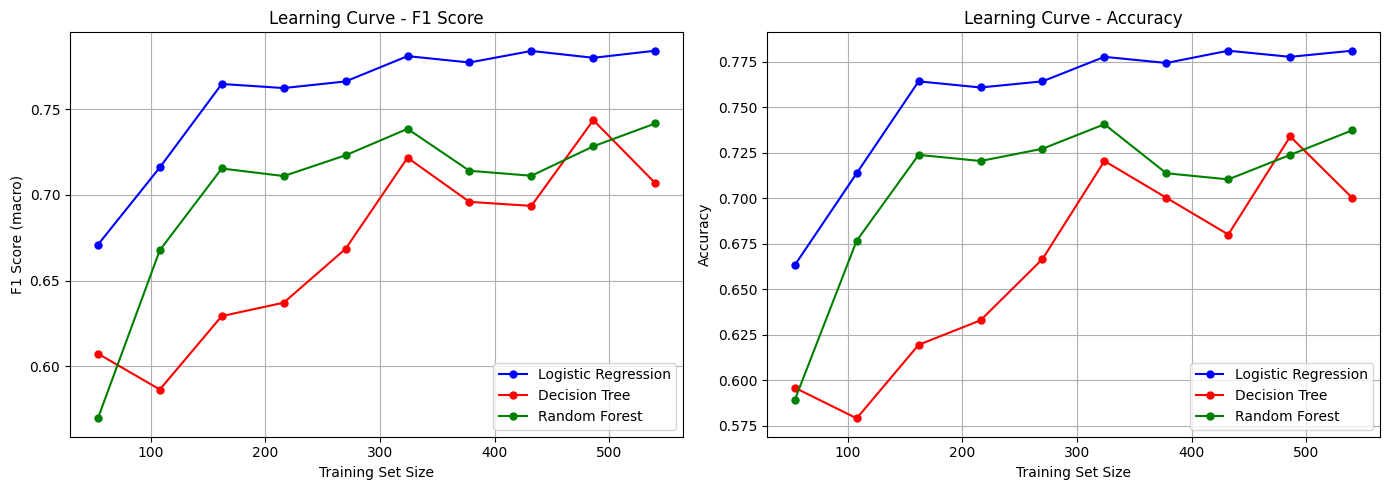


Learning Curve Analysis:
- All models generally improve with more training data, but the rate of improvement decreases.
- Decision trees may show more variance in performance with small datasets.
- Random Forest typically shows more stable learning curves due to ensemble averaging.
- If curves haven't plateaued, more data could further improve performance.
- The gap between training and validation performance indicates overfitting.


In [ ]:
# YOUR CODE HERE
n_splits = 10
split_size = len(X_train_scaled) // n_splits
train_sizes = []
f1_lr_curve = []
acc_lr_curve = []
f1_dt_curve = []
acc_dt_curve = []
f1_rf_curve = []
acc_rf_curve = []

print("Generating learning curves...")
for i in range(1, n_splits + 1):
    # Get subset of training data
    subset_size = split_size * i
    X_train_subset = X_train_scaled[:subset_size]
    y_train_subset = y_train[:subset_size]

    train_sizes.append(subset_size)

    # Train Logistic Regression
    lr_curve = LogisticRegression(**lr_base_params)
    lr_curve.fit(X_train_subset, y_train_subset)
    y_pred_lr_curve = lr_curve.predict(X_test_scaled)
    f1_lr_curve.append(f1_score(y_test, y_pred_lr_curve, average='macro'))
    acc_lr_curve.append(accuracy_score(y_test, y_pred_lr_curve))

    # Train Decision Tree
    dt_curve = DecisionTreeClassifier(**dt_base_params)
    dt_curve.fit(X_train_subset, y_train_subset)
    y_pred_dt_curve = dt_curve.predict(X_test_scaled)
    f1_dt_curve.append(f1_score(y_test, y_pred_dt_curve, average='macro'))
    acc_dt_curve.append(accuracy_score(y_test, y_pred_dt_curve))

    # Train Random Forest (use optimal number of trees)
    rf_curve = RandomForestClassifier(
        n_estimators=optimal_n_rf_f1,
        max_depth=best_max_depth,
        random_state=42,
        n_jobs=-1
    )
    rf_curve.fit(X_train_subset, y_train_subset)
    y_pred_rf_curve = rf_curve.predict(X_test_scaled)
    f1_rf_curve.append(f1_score(y_test, y_pred_rf_curve, average='macro'))
    acc_rf_curve.append(accuracy_score(y_test, y_pred_rf_curve))

    print(f"  Completed {i}/{n_splits} splits...")

# Plot learning curves
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(train_sizes, f1_lr_curve, 'b-o', label='Logistic Regression', markersize=5)
plt.plot(train_sizes, f1_dt_curve, 'r-o', label='Decision Tree', markersize=5)
plt.plot(train_sizes, f1_rf_curve, 'g-o', label='Random Forest', markersize=5)
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score (macro)')
plt.title('Learning Curve - F1 Score')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_sizes, acc_lr_curve, 'b-o', label='Logistic Regression', markersize=5)
plt.plot(train_sizes, acc_dt_curve, 'r-o', label='Decision Tree', markersize=5)
plt.plot(train_sizes, acc_rf_curve, 'g-o', label='Random Forest', markersize=5)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nLearning Curve Analysis:")
print("- All models generally improve with more training data, but the rate of improvement decreases.")
print("- Decision trees may show more variance in performance with small datasets.")
print("- Random Forest typically shows more stable learning curves due to ensemble averaging.")
print("- If curves haven't plateaued, more data could further improve performance.")
print("- The gap between training and validation performance indicates overfitting.")

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

Training XGBoost with varying number of trees...
  n_estimators=50: F1=0.7527, Acc=0.7475
  n_estimators=100: F1=0.7632, Acc=0.7576
  n_estimators=150: F1=0.7697, Acc=0.7643
  n_estimators=200: F1=0.7721, Acc=0.7677
  n_estimators=250: F1=0.7726, Acc=0.7677
  n_estimators=300: F1=0.7759, Acc=0.7710


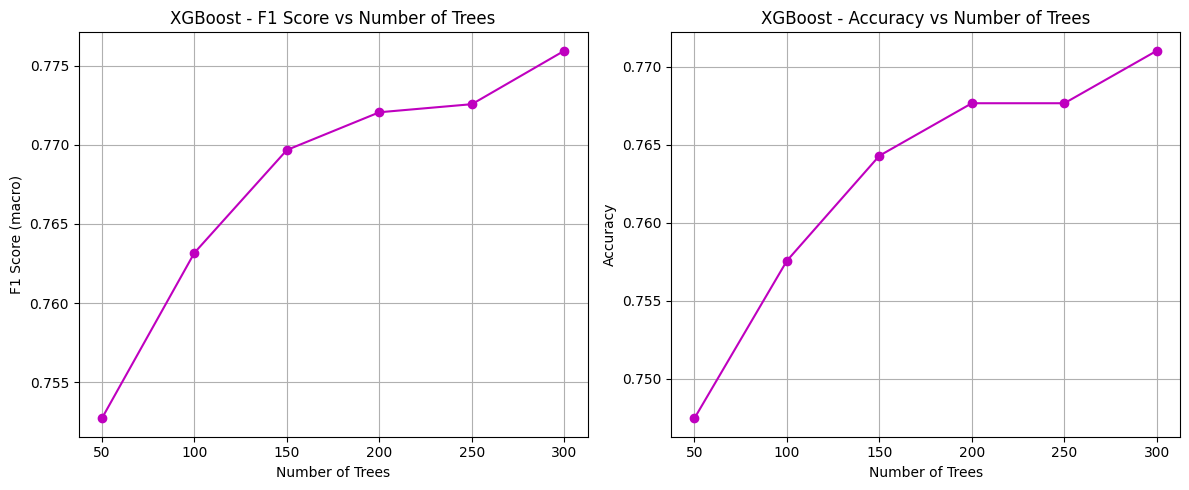


Optimal number of trees (XGBoost): 300
Best F1 score: 0.7759
Best Accuracy: 0.7710

Explanation:
- XGBoost uses gradient boosting which sequentially builds trees to correct previous errors.
- The optimal number of trees balances bias reduction with overfitting risk.
- Too few trees: underfitting, high bias
- Too many trees: overfitting, high variance
- The optimal number found provides the best generalization performance.


In [ ]:
# YOUR CODE HERE

import xgboost as xgb

# Encode target labels to integers for xgboost
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Convert to DMatrix format for xgboost
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_encoded)
dtest = xgb.DMatrix(X_test_scaled, label=y_test_encoded)

# Test different numbers of trees
n_estimators_range = [50, 100, 150, 200, 250, 300]
f1_scores_xgb = []
accuracy_scores_xgb = []

print("Training XGBoost with varying number of trees...")
for n_est in n_estimators_range:
    params = {
        'objective': 'multi:softprob',
        'num_class': len(np.unique(y_train_encoded)),
        'max_depth': best_max_depth,
        'learning_rate': 0.1,
        'random_state': 42,
        'eval_metric': 'mlogloss'
    }

    model = xgb.train(
        params,
        dtrain,
        num_boost_round=n_est,
        verbose_eval=False
    )

    y_pred_proba_xgb = model.predict(dtest)
    y_pred_xgb = np.argmax(y_pred_proba_xgb, axis=1)

    f1_scores_xgb.append(f1_score(y_test_encoded, y_pred_xgb, average='macro'))
    accuracy_scores_xgb.append(accuracy_score(y_test_encoded, y_pred_xgb))

    print(f"  n_estimators={n_est}: F1={f1_scores_xgb[-1]:.4f}, Acc={accuracy_scores_xgb[-1]:.4f}")

# Plot results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, f1_scores_xgb, 'm-o', markersize=6)
plt.xlabel('Number of Trees')
plt.ylabel('F1 Score (macro)')
plt.title('XGBoost - F1 Score vs Number of Trees')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, accuracy_scores_xgb, 'm-o', markersize=6)
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('XGBoost - Accuracy vs Number of Trees')
plt.grid(True)

plt.tight_layout()
plt.show()

optimal_n_xgb = n_estimators_range[np.argmax(f1_scores_xgb)]
print(f"\nOptimal number of trees (XGBoost): {optimal_n_xgb}")
print(f"Best F1 score: {max(f1_scores_xgb):.4f}")
print(f"Best Accuracy: {max(accuracy_scores_xgb):.4f}")

print("\nExplanation:")
print("- XGBoost uses gradient boosting which sequentially builds trees to correct previous errors.")
print("- The optimal number of trees balances bias reduction with overfitting risk.")
print("- Too few trees: underfitting, high bias")
print("- Too many trees: overfitting, high variance")
print("- The optimal number found provides the best generalization performance.")